## IPL 2021 Analysis Between CSK and RCB.
- Batting:
    - What is impact of Moeen Ali & Maxwell in CSK & RCB respectively ?
- Bowling:
    - Who is better bowler in RCB ? Mohammed Siraj or Harshal Patel ?
- AllRounder:
    - Who is the best allrounder for CSK ?
- Toss Analysis:
    - Is toss winner, the match winner ?
- Venue Analysis:
    - MA Chidambaram vs Wankedhe Stadium analysis.

In [1]:
# Import the required libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
# Import the dataset

deliveries = pd.read_csv('all_matches.csv')

In [3]:
# Make a copy of the original dataset

ddf = deliveries.copy()

In [4]:
# Display the dataframes

ddf.tail(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200177,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,19.6,Mumbai Indians,Chennai Super Kings,KA Pollard,DS Kulkarni,L Ngidi,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# To get the total runs 

ddf['total_runs'] = ddf['runs_off_bat'] + ddf['extras']

In [6]:
ddf.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1


#### - Defining a function to get the over number from ball column

In [7]:
def over_seperator(df):
    df['over'] = -1
    df['balls'] = 1
    for i in range(len(df)):
        if(df.iloc[i]['ball'] < 1 ):
            df['over'].iloc[i] = 1
        elif(df.iloc[i]['ball'] < 2 ):
            df['over'].iloc[i] = 2
        elif(df.iloc[i]['ball'] < 3 ):
            df['over'].iloc[i] = 3
        elif(df.iloc[i]['ball'] < 4 ):
            df['over'].iloc[i] = 4
        elif(df.iloc[i]['ball'] < 5 ):
            df['over'].iloc[i] = 5
        elif(df.iloc[i]['ball'] < 6 ):
            df['over'].iloc[i] = 6
        elif(df.iloc[i]['ball'] < 7 ):
            df['over'].iloc[i] = 7
        elif(df.iloc[i]['ball'] < 8 ):
            df['over'].iloc[i] = 8
        elif(df.iloc[i]['ball'] < 9 ):
            df['over'].iloc[i] = 9
        elif(df.iloc[i]['ball'] < 10 ):
            df['over'].iloc[i] = 10
        elif(df.iloc[i]['ball'] < 11 ):
            df['over'].iloc[i] = 11
        elif(df.iloc[i]['ball'] < 12 ):
            df['over'].iloc[i] = 12
        elif(df.iloc[i]['ball'] < 13 ):
            df['over'].iloc[i] = 13
        elif(df.iloc[i]['ball'] < 14 ):
            df['over'].iloc[i] = 14
        elif(df.iloc[i]['ball'] < 15 ):
            df['over'].iloc[i] = 15
        elif(df.iloc[i]['ball'] < 16 ):
            df['over'].iloc[i] = 16
        elif(df.iloc[i]['ball'] < 17 ):
            df['over'].iloc[i] = 17
        elif(df.iloc[i]['ball'] < 18 ):
            df['over'].iloc[i] = 18
        elif(df.iloc[i]['ball'] < 19 ):
            df['over'].iloc[i] = 19
        elif(df.iloc[i]['ball'] < 20 ):
            df['over'].iloc[i] = 20
        
    return df

In [8]:
ddf = over_seperator(ddf)

In [9]:
# Filtering the matches by season

ddf = ddf[(ddf['season']==2021) | (ddf['season']=='2021')]

In [10]:
ddf = ddf.rename(columns={'striker':'batsman','match_id':'id'})

### Define functions before analysing 

#### - Function to get Phase of play 

In [11]:
def Phaseofplay(over):
    
    if over < 6:
        return "Power Play"
    elif over < 15:
        return " Middle Over"
    else :
        return "Death Over"

#### - Function to get Balls per dismissal

In [12]:
def balls_per_dismissal(balls,dismissal):
    
    if dismissal > 0:
        return balls/dismissal
    else :
        return balls/1

#### - Function to get Balls per boundaries

In [13]:
def balls_per_boundaries(balls,boundaries):
    
    # boundaries = fours + sixes
    if boundaries > 0:
        return balls/boundaries
    else :
        return balls/1

#### - Function to get the player stats

In [14]:
def PlayerStats(df):
    
    df["isDots"] = df["runs_off_bat"].apply(lambda x : 1 if x == 0 else 0 )

    # column for ones, twos and threes

    df["isOnes"] = df["runs_off_bat"].apply(lambda x : 1 if x == 1 else 0 )
    df["isTwos"] = df["runs_off_bat"].apply(lambda x : 1 if x == 2 else 0 )
    df["isThrees"] = df["runs_off_bat"].apply(lambda x : 1 if x == 3 else 0 )

    # column for boundaries 

    df["isFours"] = df["runs_off_bat"].apply(lambda x : 1 if x == 4 else 0 )
    df["isSixes"] = df["runs_off_bat"].apply(lambda x : 1 if x == 6 else 0 )
    
    # filtering the player level stats using groupby function
    
    runs = pd.DataFrame(df.groupby(["batsman"])["runs_off_bat"].sum().reset_index().rename(columns={"runs_off_bat":"runs"}))
    balls = pd.DataFrame(df.groupby(["batsman"])["id"].count().reset_index().rename(columns={"id":"balls"}))
    innings = pd.DataFrame(df.groupby(["batsman"])["id"].apply(lambda x : len(list(np.unique(x)))).reset_index().rename(columns={"id":"innings"}))
    dismissals = pd.DataFrame(df.groupby(["batsman"])["player_dismissed"].count().reset_index().rename(columns={"player_dismissed":"dismissals"}))
    dots = pd.DataFrame(df.groupby(["batsman"])["isDots"].sum().reset_index().rename(columns={"isDots":"dots"}))
    ones = pd.DataFrame(df.groupby(["batsman"])["isOnes"].sum().reset_index().rename(columns={"isOnes":"ones"}))
    twos = pd.DataFrame(df.groupby(["batsman"])["isTwos"].sum().reset_index().rename(columns={"isTwos":"twos"}))
    threes = pd.DataFrame(df.groupby(["batsman"])["isThrees"].sum().reset_index().rename(columns={"isThrees":"threes"}))
    fours = pd.DataFrame(df.groupby(["batsman"])["isFours"].sum().reset_index().rename(columns={"isFours":"fours"}))
    sixes = pd.DataFrame(df.groupby(["batsman"])["isSixes"].sum().reset_index().rename(columns={"isSixes":"sixes"}))

    # merging all the data which are filtered using groupby

    df = pd.merge(innings,runs, on="batsman").merge(balls,on="batsman").merge(dismissals,on="batsman").merge(dots,on="batsman").merge(ones,on="batsman").merge(twos,on="batsman").merge(threes,on="batsman").merge(fours,on="batsman").merge(sixes,on="batsman")

    # filtering the data further to get player stats
    # strike rate

    df["SR"] = df.apply(lambda x : round(x["runs"]/x["balls"]*100,2), axis=1)
    df["dot%"] = df.apply(lambda x : round(100*(x['dots']/x['balls']),2), axis=1)
    df["RPI"] = df.apply(lambda x : round(x["runs"]/x["innings"],2), axis=1)
    df['BPD'] = df.apply(lambda x : round(balls_per_dismissal(x["balls"], x["dismissals"]),2), axis=1)
    df["BPB"] = df.apply(lambda x : round(balls_per_boundaries(x["balls"], (x["fours"]+x["sixes"])),2), axis=1)
    
    return df

In [15]:
df1 = PlayerStats(ddf)

df1.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,dot%,RPI,BPD,BPB
0,AB de Villiers,6,207,129,5,36,52,14,1,16,10,160.47,27.91,34.50,25.80,4.96
1,AD Russell,7,163,112,5,52,33,2,0,12,13,145.54,46.43,23.29,22.40,4.48
2,AM Rahane,1,8,9,1,5,2,1,0,1,0,88.89,55.56,8.00,9.00,9.00
3,AT Rayudu,5,136,71,4,21,28,3,0,6,13,191.55,29.58,27.20,17.75,3.74
4,Abdul Samad,3,26,18,2,7,6,2,0,1,2,144.44,38.89,8.67,9.00,6.00


## Batting :
- What is impact of Moeen Ali & Maxwell in CSK & RCB respectively ?

In [16]:
# Selected_player = MM Ali ,GJ Maxwell

mali_runs = df1[df1['batsman'] == 'MM Ali']
max_runs = df1[df1['batsman'] == 'GJ Maxwell']

In [17]:
best_bat_fig = mali_runs.append(max_runs)
best_bat_fig

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,dot%,RPI,BPD,BPB
60,MM Ali,6,206,136,6,63,32,7,0,22,12,151.47,46.32,34.33,22.67,4.00
26,GJ Maxwell,6,223,162,6,62,59,10,0,21,10,137.65,38.27,37.17,27.00,5.23


### Comparing the batting stats of Moeen Ali and Maxwell 

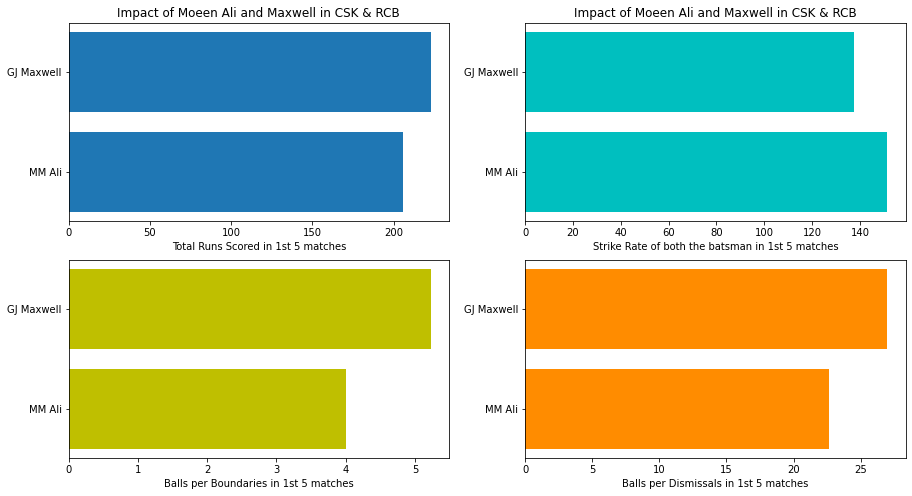

In [18]:
# Comparing the batting figure by both player 

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.barh(best_bat_fig["batsman"],best_bat_fig["runs"])
plt.title("Impact of Moeen Ali and Maxwell in CSK & RCB")
plt.xlabel("Total Runs Scored in 1st 5 matches")

plt.subplot(2,2,2)
plt.barh(best_bat_fig["batsman"],best_bat_fig["SR"],color = 'c')
plt.title("Impact of Moeen Ali and Maxwell in CSK & RCB")
plt.xlabel("Strike Rate of both the batsman in 1st 5 matches")

plt.subplot(2,2,3)
plt.barh(best_bat_fig["batsman"],best_bat_fig["BPB"],color = 'y')
plt.xlabel("Balls per Boundaries in 1st 5 matches")

plt.subplot(2,2,4)
plt.barh(best_bat_fig["batsman"],best_bat_fig["BPD"], color = 'darkorange')
plt.xlabel("Balls per Dismissals in 1st 5 matches")

plt.show()

### Inference : From the above analysis Maxwell stands out in the total runs and balls per dismissals. However Moeen Ali has higher strike rate and he takes less balls per boundaries. So from this we can conclude that both of the players have equal impact on their teams.

In [19]:
best_bat_fig.to_csv('Mali_Max_Batting.csv')

##  Bowling :
- Who is better bowler in RCB ? Mohammed Siraj or Harshal Patel ?

#### - Defining functions to get bowler stats

In [20]:
def isWicket(player_dismissed, dismissal_kind):
    
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [21]:
ddf['isbowlerwicket'] = ddf.apply(lambda x : isWicket(x["player_dismissed"],x['wicket_type']),axis =1)

In [22]:
def runs_per_ball(runs_conceeded, balls):
    if balls > 0:
        return runs_conceeded/balls
    else:
        return 1000
    
def runs_per_dismissal(runs_conceeded, dismissals):
    if dismissals > 0:
        return runs_conceeded/dismissals
    elif (runs_conceeded == 0):
        return 1000
    else:
        return runs_conceeded/1

In [23]:
def BowlingStats(df):
    
    df["isDots"] = df["total_runs"].apply(lambda x : 1 if x == 0 else 0 )

    # column for ones, twos and threes

    df["isOnes"] = df["total_runs"].apply(lambda x : 1 if x == 1 else 0 )
    df["isTwos"] = df["total_runs"].apply(lambda x : 1 if x == 2 else 0 )
    df["isThrees"] = df["total_runs"].apply(lambda x : 1 if x == 3 else 0 )

    # column for boundaries 

    df["isFours"] = df["runs_off_bat"].apply(lambda x : 1 if x == 4 else 0 )
    df["isSixes"] = df["runs_off_bat"].apply(lambda x : 1 if x == 6 else 0 )
    
    # filtering the player level stats using groupby function
    
    runs = pd.DataFrame(df.groupby(["bowler"])["total_runs"].sum().reset_index().rename(columns={"total_runs":"runs"}))
    balls = pd.DataFrame(df.groupby(["bowler"])["id"].count().reset_index().rename(columns={"id":"balls"}))
    innings = pd.DataFrame(df.groupby(["bowler"])["id"].apply(lambda x : len(list(np.unique(x)))).reset_index().rename(columns={"id":"innings"}))
    dismissals = pd.DataFrame(df.groupby(["bowler"])["isbowlerwicket"].sum().reset_index().rename(columns={"isbowlerwicket":"dismissals"}))
    dots = pd.DataFrame(df.groupby(["bowler"])["isDots"].sum().reset_index().rename(columns={"isDots":"dots"}))
    ones = pd.DataFrame(df.groupby(["bowler"])["isOnes"].sum().reset_index().rename(columns={"isOnes":"ones"}))
    twos = pd.DataFrame(df.groupby(["bowler"])["isTwos"].sum().reset_index().rename(columns={"isTwos":"twos"}))
    threes = pd.DataFrame(df.groupby(["bowler"])["isThrees"].sum().reset_index().rename(columns={"isThrees":"threes"}))
    fours = pd.DataFrame(df.groupby(["bowler"])["isFours"].sum().reset_index().rename(columns={"isFours":"fours"}))
    sixes = pd.DataFrame(df.groupby(["bowler"])["isSixes"].sum().reset_index().rename(columns={"isSixes":"sixes"}))

    # merging all the data which are filtered using groupby

    df = pd.merge(innings,runs, on="bowler").merge(balls,on="bowler").merge(dismissals,on="bowler").merge(dots,on="bowler").merge(ones,on="bowler").merge(twos,on="bowler").merge(threes,on="bowler").merge(fours,on="bowler").merge(sixes,on="bowler")

    # filtering the data further to get player stats
    # strike rate

    df["dot%"] = df.apply(lambda x : round(100*(x['dots']/x['balls']),2), axis=1)
    df["SR"] = df.apply(lambda x : round(balls_per_dismissal(x["balls"], x["dismissals"]),2), axis=1)
    df["Eco"] = df.apply(lambda x : round(runs_per_ball(x["runs"], x["balls"]),2), axis=1)
    df["Avg"] = df.apply(lambda x : round(runs_per_dismissal(x["runs"], (x["dismissals"]+x["sixes"])),2), axis=1)
    
    return df

#### -  Bowling Statistics 

In [24]:
# Selected player = Mohammed Siraj, HV Patel

In [25]:
df2 = BowlingStats(ddf)

In [26]:
ms_bowl = df2[df2['bowler'] == 'Mohammed Siraj']
hp_bowl = df2[df2['bowler'] == 'HV Patel']

In [27]:
best_bowl_fig = ms_bowl.append(hp_bowl)

In [28]:
best_bowl_fig

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,dot%,SR,Eco,Avg
53,Mohammed Siraj,7,200,161,6,71,48,13,0,22,5,44.10,26.83,1.24,18.18
22,HV Patel,7,257,178,17,56,77,12,0,22,11,31.46,10.47,1.44,9.18


In [29]:
player_dismissed_ms = pd.DataFrame(ddf[(ddf['bowler'] == 'Mohammed Siraj') & (ddf['isbowlerwicket'] == 1)]['batsman']).reset_index(drop = True)
player_dismissed_hp = pd.DataFrame(ddf[(ddf['bowler'] == 'HV Patel') & (ddf['isbowlerwicket'] == 1)]['batsman']).reset_index(drop = True)

In [30]:
over_dismissed_ms = pd.DataFrame(ddf[(ddf['bowler'] == 'Mohammed Siraj') & (ddf['isbowlerwicket'] == 1)]['over']).reset_index(drop = True)
over_dismissed_hp = pd.DataFrame(ddf[(ddf['bowler'] == 'HV Patel') & (ddf['isbowlerwicket'] == 1)]['over']).reset_index(drop = True)

In [31]:
player_dismissed_ms['batsman'].unique()

array(['WP Saha', 'JO Holder', 'JC Buttler', 'DA Miller', 'R Tewatia',
       'SPD Smith'], dtype=object)

In [32]:
player_dismissed_hp['batsman'].unique()

array(['HH Pandya', 'Ishan Kishan', 'KH Pandya', 'KA Pollard', 'M Jansen',
       'V Shankar', 'S Nadeem', 'EJG Morgan', 'AD Russell', 'R Parag',
       'CH Morris', 'C Sakariya', 'SK Raina', 'F du Plessis', 'AT Rayudu',
       'PP Shaw', 'MP Stoinis'], dtype=object)

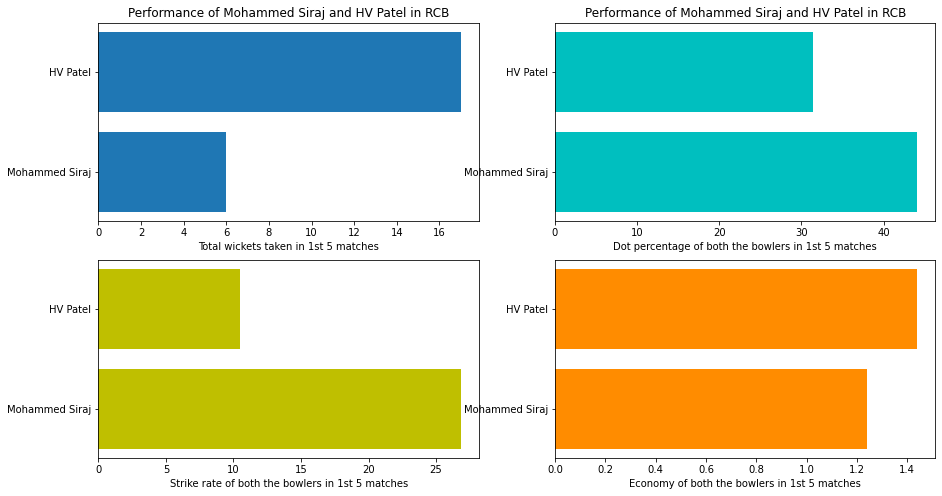

In [33]:
# Comparing the bowling figure by both player 

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.barh(best_bowl_fig["bowler"],best_bowl_fig["dismissals"])
plt.title("Performance of Mohammed Siraj and HV Patel in RCB")
plt.xlabel("Total wickets taken in 1st 5 matches")

plt.subplot(2,2,2)
plt.barh(best_bowl_fig["bowler"],best_bowl_fig["dot%"],color = 'c')
plt.title("Performance of Mohammed Siraj and HV Patel in RCB")
plt.xlabel("Dot percentage of both the bowlers in 1st 5 matches")

plt.subplot(2,2,3)
plt.barh(best_bowl_fig["bowler"],best_bowl_fig["SR"],color = 'y')
plt.xlabel("Strike rate of both the bowlers in 1st 5 matches")

plt.subplot(2,2,4)
plt.barh(best_bowl_fig["bowler"],best_bowl_fig["Eco"],color = 'darkorange')
plt.xlabel("Economy of both the bowlers in 1st 5 matches")

plt.show()

### Inference : From the above analysis we can clearly say that Harshal Patel's performance has a huge impact in RCB 

In [34]:
best_bowl_fig.to_csv('Siraj&HPatel.csv')

## All Rounder Analysis
- Who is the best all rounder for CSK ?

In [35]:
ar_bat_df = PlayerStats(ddf)

# renaming the name columns
ar_bat_df = ar_bat_df.rename(columns={'batsman':'batsman/bowler','innings':'bat_innings','runs':'runs_scored','dismissals':'got_dismissed','SR':'bat_SR','dot%':'bat_dot%','balls':'balls_faced'})
ar_bat_df = ar_bat_df.drop(['dots','ones','twos','threes','fours','sixes'],axis=1)
ar_bat_df.head(1)

,batsman/bowler,bat_innings,runs_scored,balls_faced,got_dismissed,bat_SR,bat_dot%,RPI,BPD,BPB
0,AB de Villiers,6,207,129,5,160.47,27.91,34.5,25.8,4.96


In [36]:
ar_bowl_df = BowlingStats(ddf)

# renaming the name columns
ar_bowl_df = ar_bowl_df.rename(columns={'bowler':'batsman/bowler','innings':'bowl_innings','runs':'runs_conceeded','dismissals':'wickets_taken','SR':'bowl_SR','dot%':'bowl_dot%','balls':'total_balls'})
ar_bowl_df = ar_bowl_df.drop(['dots','ones','twos','threes','fours','sixes'],axis=1)
ar_bowl_df.head(1)

,batsman/bowler,bowl_innings,runs_conceeded,total_balls,wickets_taken,bowl_dot%,bowl_SR,Eco,Avg
0,A Mishra,4,109,84,6,29.76,14.0,1.3,10.9


In [37]:
ar_comb_df = pd.merge(ar_bat_df,ar_bowl_df, on='batsman/bowler')
ar_comb_df.head(1)

,batsman/bowler,bat_innings,runs_scored,balls_faced,got_dismissed,bat_SR,bat_dot%,RPI,BPD,BPB,bowl_innings,runs_conceeded,total_balls,wickets_taken,bowl_dot%,bowl_SR,Eco,Avg
0,AD Russell,7,163,112,5,145.54,46.43,23.29,22.4,4.48,5,114,66,7,33.33,9.43,1.73,9.5


In [38]:
# MM Ali, SM Curran, RA Jadeja

In [39]:
mali_ar = ar_comb_df[ar_comb_df['batsman/bowler'] == 'MM Ali']
scurran_ar = ar_comb_df[ar_comb_df['batsman/bowler'] == 'SM Curran']
jaddu_ar = ar_comb_df[ar_comb_df['batsman/bowler'] == 'RA Jadeja']

In [40]:
comb_df = mali_ar.append(scurran_ar)
comb_df = comb_df.append(jaddu_ar)
comb_df

,batsman/bowler,bat_innings,runs_scored,balls_faced,got_dismissed,bat_SR,bat_dot%,RPI,BPD,BPB,bowl_innings,runs_conceeded,total_balls,wickets_taken,bowl_dot%,bowl_SR,Eco,Avg
37,MM Ali,6,206,136,6,151.47,46.32,34.33,22.67,4.00,5,76,73,5,34.25,14.60,1.04,8.44
57,SM Curran,3,52,26,2,200.00,23.08,17.33,13.00,3.25,7,221,155,9,40.65,17.22,1.43,9.61
49,RA Jadeja,6,131,89,2,147.19,30.34,21.83,44.50,5.24,7,161,148,6,39.19,24.67,1.09,11.50


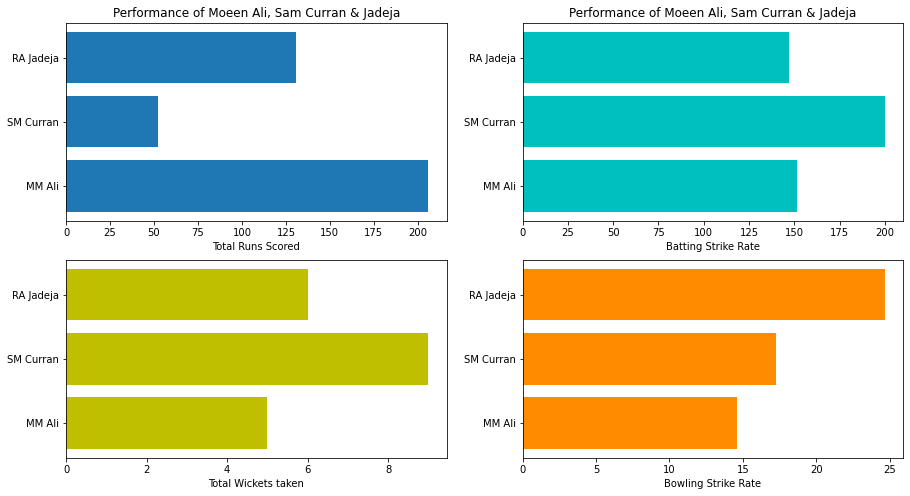

In [41]:
# Plotting the graph to visualise the data

plt.figure(figsize=(15,8))

# we are assuming runs scored & batting SR to evaluate batting performance 

plt.subplot(2,2,1)
plt.barh(comb_df["batsman/bowler"],comb_df["runs_scored"])
plt.title("Performance of Moeen Ali, Sam Curran & Jadeja")
plt.xlabel("Total Runs Scored")

plt.subplot(2,2,2)
plt.barh(comb_df["batsman/bowler"],comb_df["bat_SR"],color = 'c')
plt.title("Performance of Moeen Ali, Sam Curran & Jadeja")
plt.xlabel("Batting Strike Rate")


# we are assuming wickets taken & bowling SR to evaluate batting performance 

plt.subplot(2,2,3)
plt.barh(comb_df["batsman/bowler"],comb_df["wickets_taken"],color = 'y')
plt.xlabel("Total Wickets taken")

plt.subplot(2,2,4)
plt.barh(comb_df["batsman/bowler"],comb_df["bowl_SR"], color = 'darkorange')
plt.xlabel("Bowling Strike Rate")


plt.show()

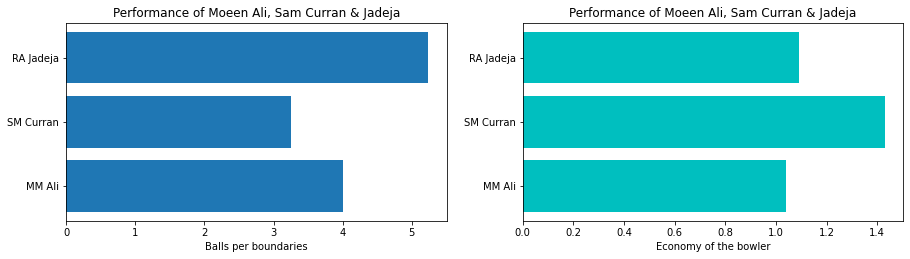

In [42]:
plt.figure(figsize=(15,8))

# Assuming balls per boundary is an additional parameter to evaluate an all rounder in batting 

plt.subplot(2,2,1)
plt.barh(comb_df["batsman/bowler"],comb_df["BPB"])
plt.title("Performance of Moeen Ali, Sam Curran & Jadeja")
plt.xlabel("Balls per boundaries")

# Assuming economy is an additional parameter to evaluate an all rounder in bowling

plt.subplot(2,2,2)
plt.barh(comb_df["batsman/bowler"],comb_df["Eco"],color = 'c')
plt.title("Performance of Moeen Ali, Sam Curran & Jadeja")
plt.xlabel("Economy of the bowler")

plt.show()

### Inference : Analysing the above parameters we can conclude that Sam Curran has better stats as an all rounder than Moeen Ali and Jadeja. However as we know Moeen Ali's middle over contribution and Jadeja's death over contribution plays a vital role in run scoring for CSK.

In [43]:
comb_df.to_csv('all_rounder_csk.csv')

## Toss Analysis
- Is toss winner the match winner ?


In [44]:
mdf = pd.read_csv('IPL Matches Dataset 2021.csv')

In [45]:
combined_df = pd.merge(ddf,mdf,on='id',how='left')
combined_df.head(1)

,id,season,start_date,venue_x,innings,ball,batting_team,bowling_team,batsman,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,over,balls,isDots,isOnes,isTwos,isThrees,isFours,isSixes,isbowlerwicket,city,date,player_of_match,venue_y,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,0,0,1,0,0,0,0,Chennai,2021-04-09,HV Patel,"MA Chidambaram Stadium, Chepauk, Chennai",0.0,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,2.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon


In [46]:
# Defining functions to get winning toss and winning match

def wintoss_winmatch(toss_winner,winner):
    if toss_winner == winner:
        return 1
    else:
        return 0

# Defining functions to get winning toss and losing match    
    
def wintoss_lossmatch(toss_winner,winner):
    if toss_winner != winner:
        return 1 
    else:
        return 0 

In [47]:
combined_df["wintoss_winmatch"] = combined_df.apply(lambda x : wintoss_winmatch(x['toss_winner'], x['winner']),axis=1)
combined_df["wintoss_lossmatch"] = combined_df.apply(lambda x : wintoss_lossmatch(x['toss_winner'], x['winner']),axis=1)

In [48]:
combined_df.head(1)

,id,season,start_date,venue_x,innings,ball,batting_team,bowling_team,batsman,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,over,balls,isDots,isOnes,isTwos,isThrees,isFours,isSixes,isbowlerwicket,city,date,player_of_match,venue_y,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,wintoss_winmatch,wintoss_lossmatch
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,0,0,1,0,0,0,0,Chennai,2021-04-09,HV Patel,"MA Chidambaram Stadium, Chepauk, Chennai",0.0,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,2.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon,1,0


In [49]:
wintoss_winmatch_df = pd.DataFrame(round(combined_df.groupby(["toss_winner"])["wintoss_winmatch"].sum()/combined_df.groupby(["toss_winner"])["wintoss_winmatch"].count()*100,2)).reset_index().rename(columns={"wintoss_winmatch":"match_win%"})
wintoss_lossmatch_df = pd.DataFrame(round(combined_df.groupby(["toss_winner"])["wintoss_lossmatch"].sum()/combined_df.groupby(["toss_winner"])["wintoss_lossmatch"].count()*100,2)).reset_index().rename(columns={"wintoss_lossmatch":"match_win%"})

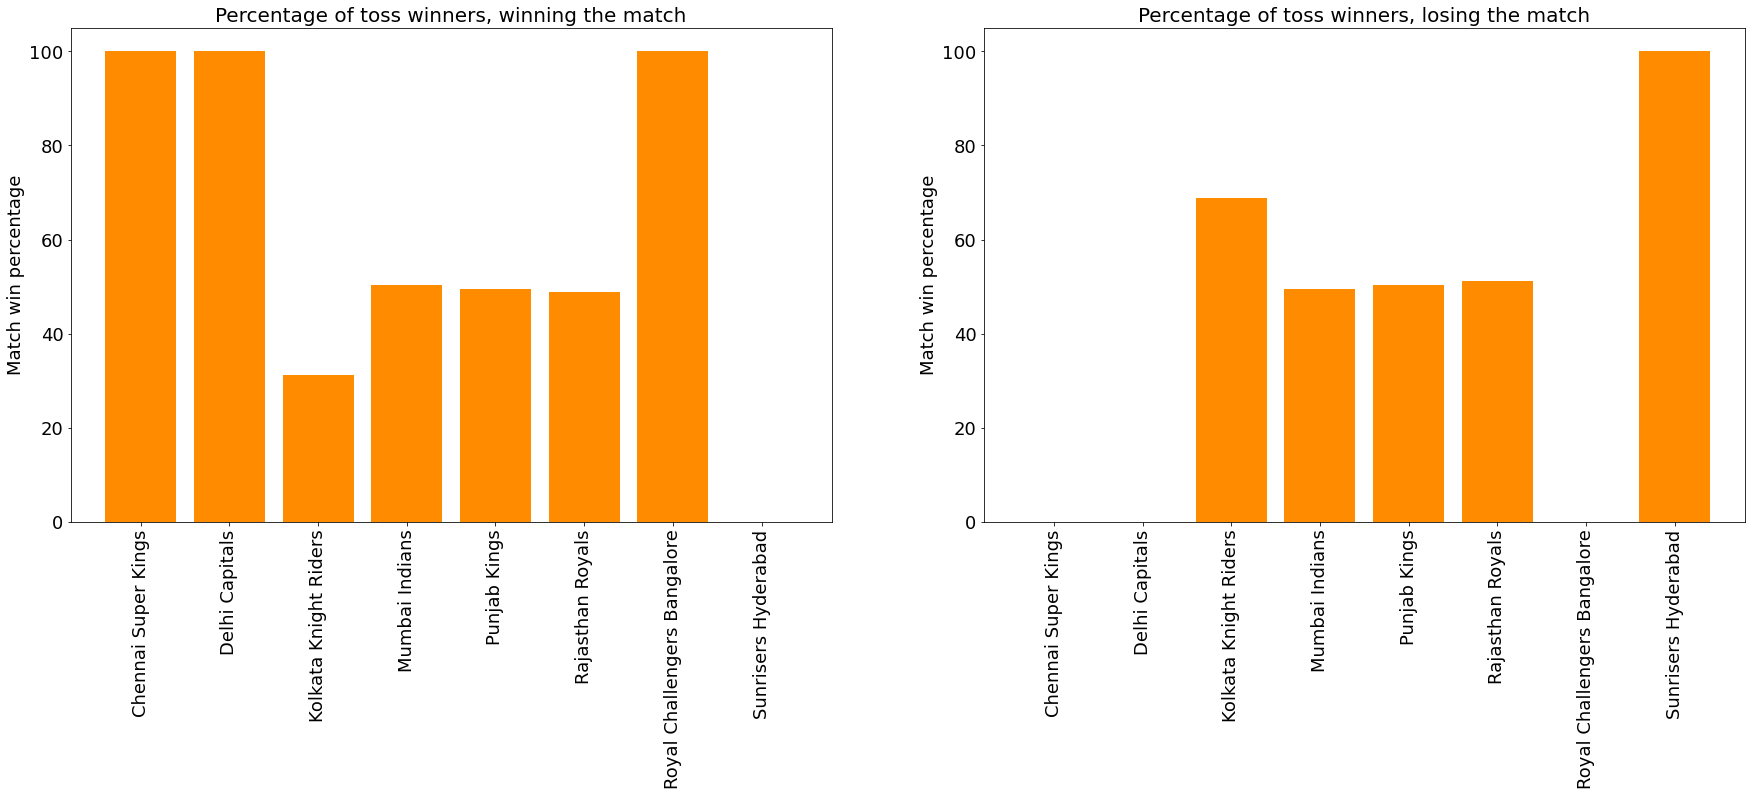

In [50]:
# Plotting the comparision of Toss results

plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.bar(wintoss_winmatch_df['toss_winner'],wintoss_winmatch_df['match_win%'],color = 'darkorange')
plt.title('Percentage of toss winners, winning the match',fontsize=20)
plt.ylabel('Match win percentage',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(2,2,2)
plt.bar(wintoss_lossmatch_df['toss_winner'],wintoss_lossmatch_df['match_win%'],color = 'darkorange')
plt.title('Percentage of toss winners, losing the match',fontsize=20)
plt.ylabel('Match win percentage',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)

plt.show()

### Inference :
#### Hypothesis 1 : Winning the toss and Winning the match
- We can infer that CSK,DC and RCB won all the match where they won the toss.

#### Hypothesis 2 : Winning the toss and Losing the match
- SRH is the only team with most number of losses even when they won the toss and KKR is next to them.

In [51]:
# Merge two dataframe into one

wintoss_winmatch_df = wintoss_winmatch_df.rename(columns={'match_win%':'wintoss_winmatch%'})
wintoss_lossmatch_df = wintoss_lossmatch_df.rename(columns={'match_win%':'wintoss_lossmatch%'})
toss_comb_df = pd.merge(wintoss_winmatch_df,wintoss_lossmatch_df,on='toss_winner')

In [52]:
toss_comb_df

,toss_winner,wintoss_winmatch%,wintoss_lossmatch%
0,Chennai Super Kings,100.00,0.00
1,Delhi Capitals,100.00,0.00
2,Kolkata Knight Riders,31.16,68.84
3,Mumbai Indians,50.41,49.59
4,Punjab Kings,49.57,50.43
5,Rajasthan Royals,48.90,51.10
6,Royal Challengers Bangalore,100.00,0.00
7,Sunrisers Hyderabad,0.00,100.00


In [53]:
toss_comb_df.to_csv('toss_analysis.csv')

## Venue Analysis 
- Analysis between MA Chidambaram Stadium vs Wankadhe Stadium

In [54]:
#import the datasets

matches = pd.read_csv('all_matches.csv')

In [55]:
matches.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [56]:
# Filtering the matches by season

cs_df = matches[(matches['season']==2021) | (matches['season']=='2021')]
ws_df = matches[(matches['season']==2021) | (matches['season']=='2021')]

In [57]:
# 'MA Chidambaram Stadium, Chepauk, Chennai' , 'Wankhede Stadium, Mumbai'

In [58]:
# Filtering the matches by venue

cs_df = cs_df[cs_df['venue'] == 'MA Chidambaram Stadium, Chepauk, Chennai']
ws_df = ws_df[ws_df['venue'] == 'Wankhede Stadium, Mumbai']

In [59]:
# Since we dont have the over details in the dataset, we need to seperate the overs

def over_seperator(df):
    df['over'] = -1
    df['balls'] = 1
    for i in range(len(df)):
        if(df.iloc[i]['ball'] < 1 ):
            df['over'].iloc[i] = 1
        elif(df.iloc[i]['ball'] < 2 ):
            df['over'].iloc[i] = 2
        elif(df.iloc[i]['ball'] < 3 ):
            df['over'].iloc[i] = 3
        elif(df.iloc[i]['ball'] < 4 ):
            df['over'].iloc[i] = 4
        elif(df.iloc[i]['ball'] < 5 ):
            df['over'].iloc[i] = 5
        elif(df.iloc[i]['ball'] < 6 ):
            df['over'].iloc[i] = 6
        elif(df.iloc[i]['ball'] < 7 ):
            df['over'].iloc[i] = 7
        elif(df.iloc[i]['ball'] < 8 ):
            df['over'].iloc[i] = 8
        elif(df.iloc[i]['ball'] < 9 ):
            df['over'].iloc[i] = 9
        elif(df.iloc[i]['ball'] < 10 ):
            df['over'].iloc[i] = 10
        elif(df.iloc[i]['ball'] < 11 ):
            df['over'].iloc[i] = 11
        elif(df.iloc[i]['ball'] < 12 ):
            df['over'].iloc[i] = 12
        elif(df.iloc[i]['ball'] < 13 ):
            df['over'].iloc[i] = 13
        elif(df.iloc[i]['ball'] < 14 ):
            df['over'].iloc[i] = 14
        elif(df.iloc[i]['ball'] < 15 ):
            df['over'].iloc[i] = 15
        elif(df.iloc[i]['ball'] < 16 ):
            df['over'].iloc[i] = 16
        elif(df.iloc[i]['ball'] < 17 ):
            df['over'].iloc[i] = 17
        elif(df.iloc[i]['ball'] < 18 ):
            df['over'].iloc[i] = 18
        elif(df.iloc[i]['ball'] < 19 ):
            df['over'].iloc[i] = 19
        elif(df.iloc[i]['ball'] < 20 ):
            df['over'].iloc[i] = 20
        
    return df

In [60]:
# Apply the over seperator function 

cs_df = over_seperator(cs_df)
ws_df = over_seperator(ws_df)

In [61]:
# Grouping by over number

cs_df = cs_df.groupby(['over']).sum()
ws_df = ws_df.groupby(['over']).sum()

# Defining th run rate column to the Dataframe

cs_df['run_rate'] = (cs_df['runs_off_bat'] + cs_df['extras']) / (cs_df['balls'] - cs_df['wides'] - cs_df['noballs']) * 6 
ws_df['run_rate'] = (ws_df['runs_off_bat'] + ws_df['extras']) / (ws_df['balls'] - ws_df['wides'] - ws_df['noballs']) * 6 

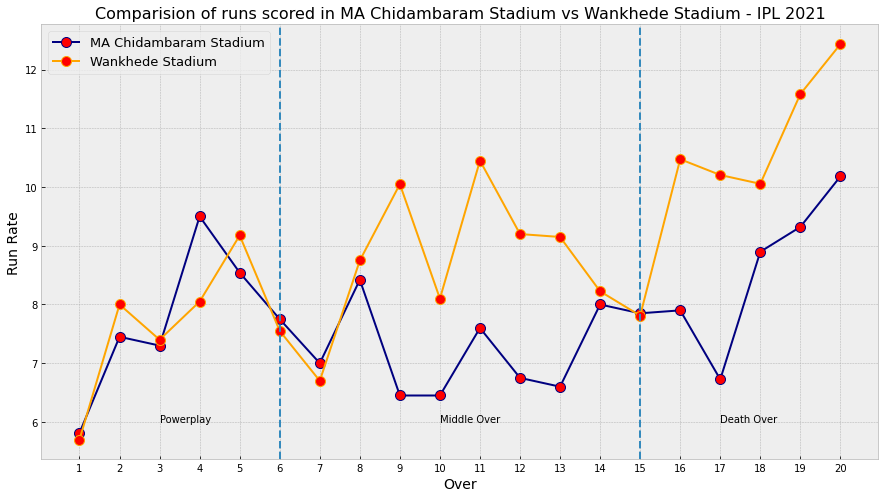

In [62]:
# Plotting the graphy to visualise the data

plt.figure(figsize=(15,8))
plt.style.use('bmh')

plt.plot(cs_df['run_rate'],color='navy',marker='o',markerfacecolor='r',markersize=10)
plt.plot(ws_df['run_rate'],color='orange',marker='o',markerfacecolor='r',markersize=10)

plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Comparision of runs scored in MA Chidambaram Stadium vs Wankhede Stadium - IPL 2021',fontsize=16)
plt.xlabel('Over',fontsize=14)
plt.ylabel('Run Rate',fontsize=14)
plt.legend(['MA Chidambaram Stadium','Wankhede Stadium'],fontsize=13)

# Phase of play
plt.axvline(x=6,linestyle ='--')
plt.axvline(x=15,linestyle ='--')
plt.text(3,6,'Powerplay')
plt.text(10,6,'Middle Over')
plt.text(17,6,'Death Over')

plt.show()

### Inference: From the above graph we can clearly understand that run rate is higher in Wankhede stadium than in MA Chidambaram stadium.  Clearly Wankhede stadium is favourable for batting and Chepauk stadium record a low scoring games.

In [63]:
cs_df.to_csv('run_rate_at_chepauk.csv')

In [64]:
ws_df.to_csv('run_rate_at_wankhede.csv')

In [65]:
cs_df.head()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,balls,run_rate
over,,,,,,,,,,,,,,
1,169299132,227,48.3,109,15,6.0,1.0,4.0,4.0,0.0,0.0,0.0,135,5.812500
2,156758356,187,170.5,139,10,4.0,1.0,0.0,5.0,0.0,0.0,0.0,125,7.450000
3,155504271,185,292.8,141,5,4.0,0.0,0.0,1.0,0.0,0.0,0.0,124,7.300000
4,155504291,188,416.8,185,5,2.0,2.0,0.0,1.0,0.0,0.0,0.0,124,9.500000
5,156758339,188,545.5,161,7,7.0,0.0,0.0,0.0,0.0,0.0,0.0,125,8.542373
